# Credit Card Fraud Detection

In [34]:
import pandas as pd
from pandas.api.types import is_string_dtype,is_numeric_dtype
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report, matthews_corrcoef,f1_score
from sklearn.externals import joblib
from matplotlib import pyplot as plt
import seaborn as sns
import joblib
import numpy as np

%matplotlib inline

In [2]:
%pwd

'C:\\Users\\adesh\\Downloads'

In [7]:
my_path= 'C:\\Users\\adesh\\Info'

In [13]:
data = pd.read_csv(f'{my_path}/creditcard.csv')
print(data.shape)
data.head(5)

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# check for missing data

In [45]:
total = data.isnull().sum().sort_values(ascending = False)

pd.concat([total], axis=1, keys=['Total']).transpose()

,Class,V14,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Time
Total,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#There is no missing data in this dataset

In [14]:
fraud = data.loc[data['Class']== 1]
normal = data.loc[data['Class']== 0]

In [19]:
len(fraud)
len(normal)

284315

# Exploratory Data Analysis

In [131]:
len(data)

284807

Text(0, 0.5, 'Frequency')

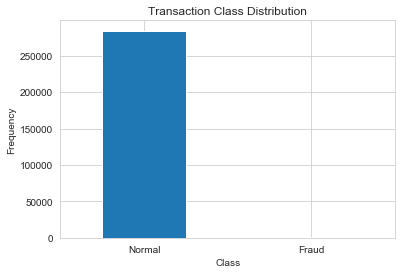

In [120]:
count_classes = pd.value_counts(data['Class'], sort = True)
LABELS = ['Normal', 'Fraud']
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [ ]:
#There are only 492 transactions that are fraud in this entire dataset

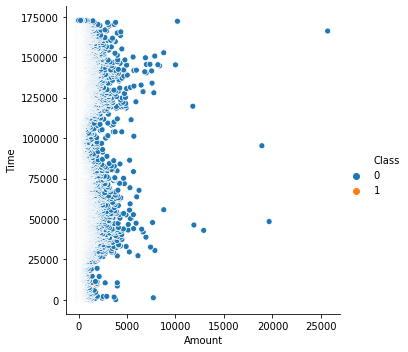

In [20]:
sns.relplot(x= 'Amount', y='Time', hue='Class', data=data )

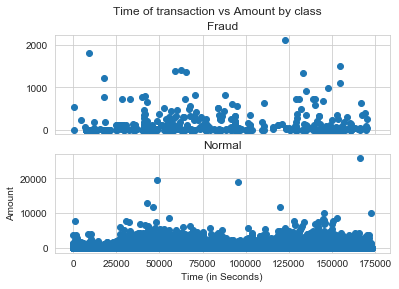

In [126]:
fraud = data[data['Class']==1]
Normal = data[data['Class']==0]
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(Normal.Time, Normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

<Figure size 432x288 with 0 Axes>

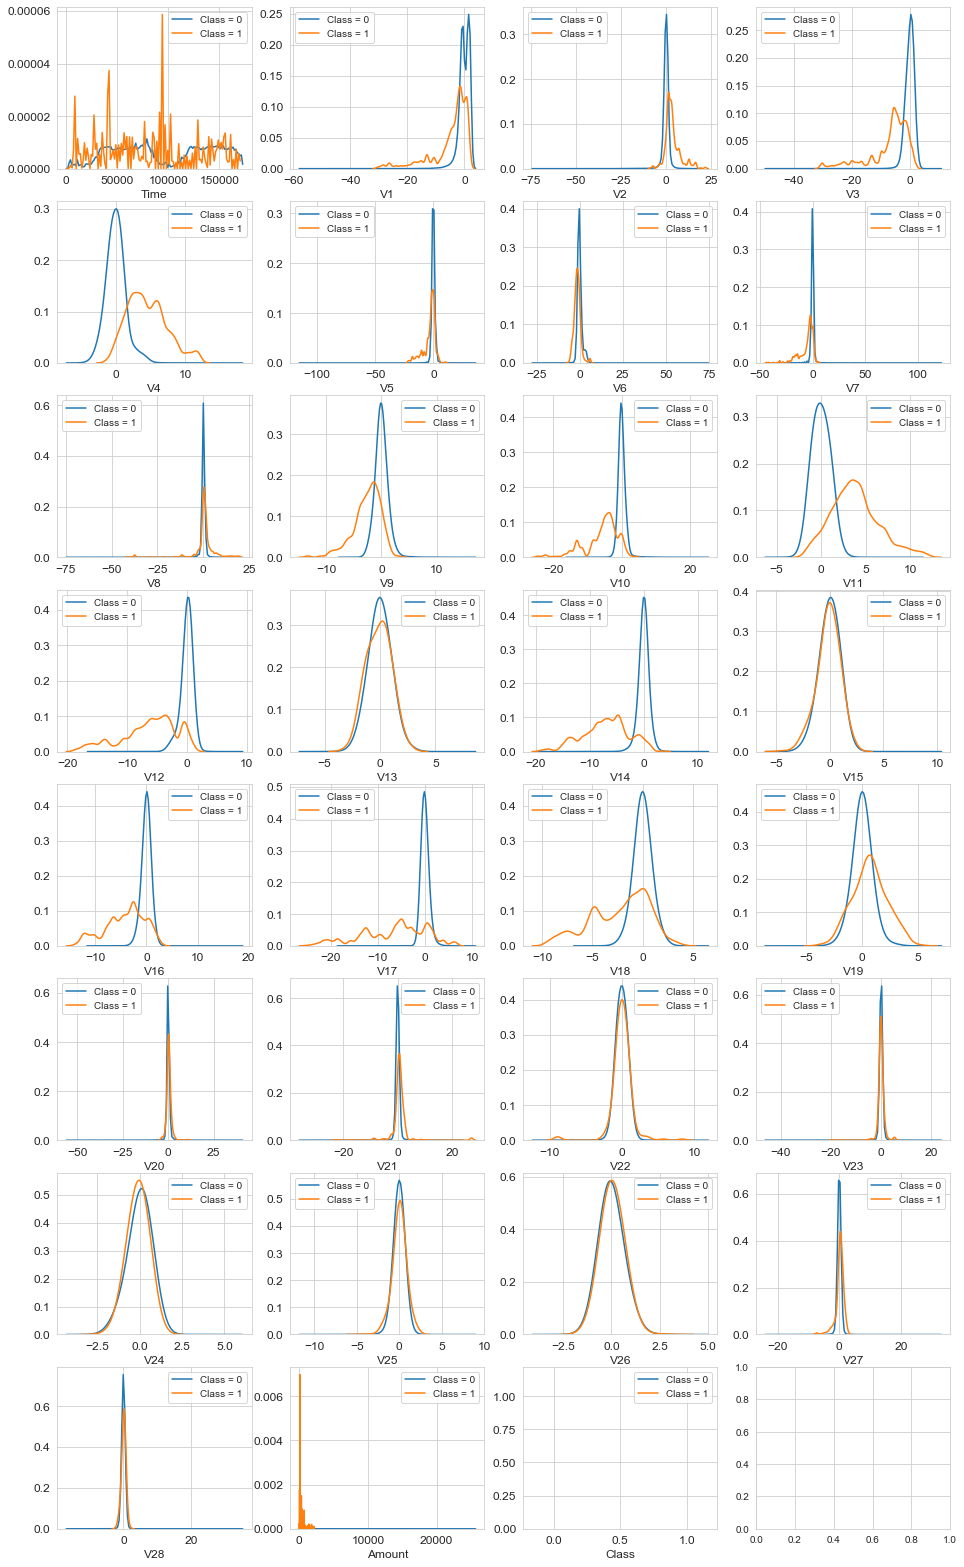

In [129]:
var = data.columns.values

i = 0
t0 = data.loc[data['Class'] == 0]
t1 = data.loc[data['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

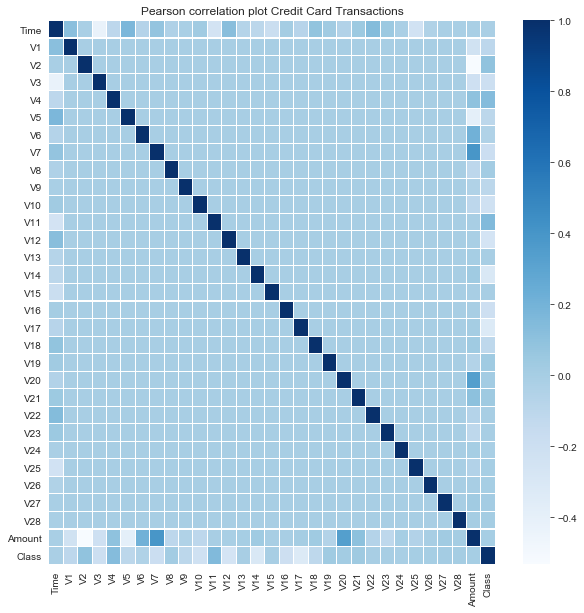

In [56]:
#get correlations of each features in dataset
plt.figure(figsize = (10,10))
plt.title('Pearson correlation plot Credit Card Transactions')
corr = data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Blues")
plt.show()

# train-test split

In [23]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [25]:
x= data.iloc[:,:-1]
y= data['Class']

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [29]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(227845, 30) (56962, 30) (227845,) (56962,)


# Logistic regression

In [30]:
clf = linear_model.LogisticRegression(C=1e5)

In [31]:
clf.fit(x_train, y_train)

C:\Users\adesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
y_pred = np.array(clf.predict(x_test))
y= np.array(y_test)

In [35]:
print(confusion_matrix(y_test, y_pred))

[[56831    26]
 [   40    65]]


In [38]:
print(accuracy_score(y_test, y_pred))

0.9988413328183702


In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56857
           1       0.71      0.62      0.66       105

    accuracy                           1.00     56962
   macro avg       0.86      0.81      0.83     56962
weighted avg       1.00      1.00      1.00     56962



# Random Forest 

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
clf = RandomForestClassifier(n_jobs=4, random_state=2018, criterion='gini', n_estimators=100, verbose=False)

In [59]:
clf.fit(x_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=2018, verbose=False,
                       warm_start=False)

In [60]:
# predictions 
y_pred = clf.predict(x_test)

In [61]:
#Evaluating Model
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 

In [62]:
acc = accuracy_score(y_test, y_pred) 
print("The accuracy is {}".format(acc)) 
  
pre = precision_score(y_test, y_pred) 
print("The precision is {}".format(pre)) 
  
f1_score = f1_score(y_test, y_pred) 
print("The F1-Score is {}".format(f1_score)) 
  
MCC = matthews_corrcoef(y_test, y_pred) 
print("The Matthews correlation coefficient is{}".format(MCC)) 

The accuracy is 0.9995259997893332
The precision is 0.9642857142857143
The F1-Score is 0.8571428571428572
The Matthews correlation coefficient is0.8622651477513523


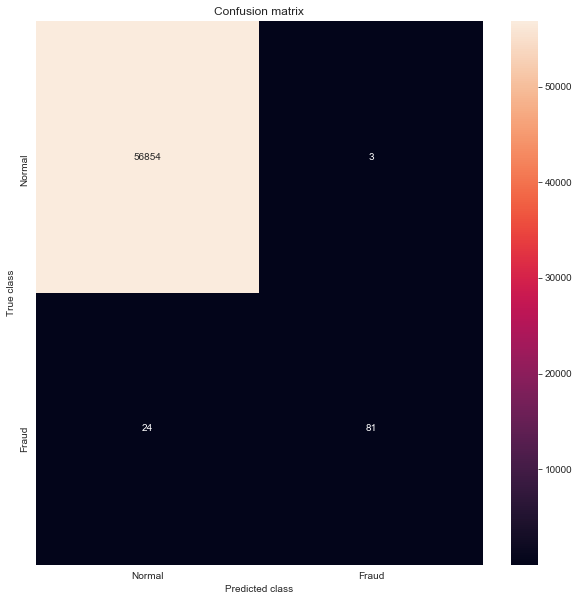

In [97]:
# printing the confusion matrix 
conf_matrix = confusion_matrix(y_test, y_pred) 
plt.figure(figsize =(10, 10))
L = ['Normal', 'Fraud']
sns.heatmap(conf_matrix, xticklabels = L, yticklabels = L, annot = True, fmt ="d"); 
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Deep Neural Network

In [69]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
C:\Users\adesh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\adesh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\adesh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\adesh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [73]:
model = Sequential()
model.add(Dense(10, input_dim=30, init='uniform', activation='relu'))
model.add(Dense(6, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

C:\Users\adesh\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, input_dim=30, activation="relu", kernel_initializer="uniform")`
  
C:\Users\adesh\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(6, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\adesh\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  after removing the cwd from sys.path.


In [74]:
# Compile the DNN
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [76]:
# Fit the DNN with your train data
history= model.fit(x_train, y_train, validation_data=(x_test, y_test), nb_epoch=10, batch_size=500)

Train on 227845 samples, validate on 56962 samples
Epoch 1/10
 19000/227845 [=>............................] - ETA: 1s - loss: 0.0138 - accuracy: 0.9981

C:\Users\adesh\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


227845/227845 [==============================] - 2s 10us/step - loss: 0.0131 - accuracy: 0.9983 - val_loss: 0.0135 - val_accuracy: 0.9982
Epoch 2/10
227845/227845 [==============================] - 2s 10us/step - loss: 0.0130 - accuracy: 0.9983 - val_loss: 0.0135 - val_accuracy: 0.9982
Epoch 3/10
227845/227845 [==============================] - 1s 4us/step - loss: 0.0129 - accuracy: 0.9983 - val_loss: 0.0135 - val_accuracy: 0.9982
Epoch 4/10
227845/227845 [==============================] - 1s 6us/step - loss: 0.0129 - accuracy: 0.9983 - val_loss: 0.0135 - val_accuracy: 0.9982
Epoch 5/10
227845/227845 [==============================] - 2s 9us/step - loss: 0.0129 - accuracy: 0.9983 - val_loss: 0.0135 - val_accuracy: 0.9982
Epoch 6/10
227845/227845 [==============================] - 2s 8us/step - loss: 0.0128 - accuracy: 0.9983 - val_loss: 0.0135 - val_accuracy: 0.9982
Epoch 7/10
227845/227845 [==============================] - 2s 10us/step - loss: 0.0127 - accuracy: 0.9983 - val_loss: 0.

In [77]:
# Evaluate the model on test set
scores = model.evaluate(x_test, y_test)
print ("Accuracy: %.2f%%" %(scores[1]*100))

56962/56962 [==============================] - 3s 44us/step
Accuracy: 99.82%


In [ ]:
#Hypertuning of DNN model

In [81]:
history= model.fit(x_train, y_train, validation_data=(x_test, y_test), nb_epoch=50, batch_size=100)

Train on 227845 samples, validate on 56962 samples
Epoch 1/50
  8100/227845 [>.............................] - ETA: 4s - loss: 0.0135 - accuracy: 0.9981

C:\Users\adesh\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


227845/227845 [==============================] - 5s 24us/step - loss: 0.0125 - accuracy: 0.9983 - val_loss: 0.0135 - val_accuracy: 0.9982
Epoch 2/50
227845/227845 [==============================] - 7s 29us/step - loss: 0.0125 - accuracy: 0.9983 - val_loss: 0.0135 - val_accuracy: 0.9982
Epoch 3/50
227845/227845 [==============================] - 5s 24us/step - loss: 0.0127 - accuracy: 0.9983 - val_loss: 0.0134 - val_accuracy: 0.9982
Epoch 4/50
227845/227845 [==============================] - 6s 24us/step - loss: 0.0125 - accuracy: 0.9983 - val_loss: 0.0135 - val_accuracy: 0.9982
Epoch 5/50
227845/227845 [==============================] - 5s 23us/step - loss: 0.0125 - accuracy: 0.9983 - val_loss: 0.0135 - val_accuracy: 0.9982
Epoch 6/50
227845/227845 [==============================] - 7s 30us/step - loss: 0.0125 - accuracy: 0.9983 - val_loss: 0.0134 - val_accuracy: 0.9982
Epoch 7/50
227845/227845 [==============================] - 6s 26us/step - loss: 0.0126 - accuracy: 0.9983 - val_loss

In [84]:
# Evaluate the model on test set
scores = model.evaluate(x_test, y_test)
print ("Accuracy: %.2f%%" %(scores[1]*100))

56962/56962 [==============================] - 2s 27us/step
Accuracy: 99.81%


In [ ]:
##Report results using nice ROC curves, report AUC values.

In [86]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [87]:
ns_probs = [0 for _ in range(len(y_test))]

In [88]:
# predict probabilities
lr_probs = model.predict_proba(x_test)

In [90]:
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

In [91]:
# summarize scores
print('ROC AUC=%.3f' % (ns_auc))
print('ROC AUC=%.3f' % (lr_auc))

ROC AUC=0.500
ROC AUC=0.501


In [92]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

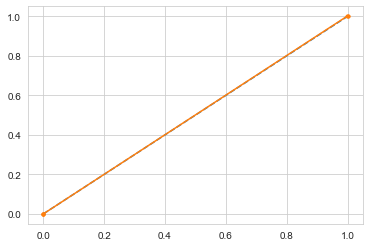

In [93]:
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--')
pyplot.plot(lr_fpr, lr_tpr, marker='.')

ROC AUC=0.500
ROC AUC=0.502


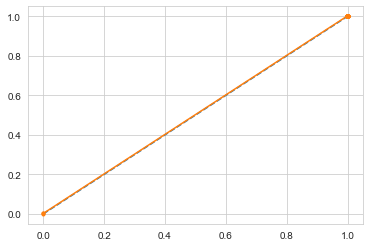

In [94]:
#for training set
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(x_train)
#lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('ROC AUC=%.3f' % (ns_auc))
print('ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--')
pyplot.plot(lr_fpr, lr_tpr, marker='.')

In [ ]:
#KNN Model

In [98]:

my_knn_model = KNeighborsClassifier(n_neighbors = 5,weights = 'uniform')
my_knn_model.fit(x_train,y_train)

#Predict on the validation set
y_pred = my_knn_model.predict(x_test)

In [100]:
print(accuracy_score(y_test,y_pred))

0.9982444436641972


In [ ]:
#Gradient Boosting

In [116]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

In [104]:
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(x_train, y_train)
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(x_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(x_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.997
Accuracy score (validation): 0.997
Learning rate:  0.075
Accuracy score (training): 0.998
Accuracy score (validation): 0.998
Learning rate:  0.1
Accuracy score (training): 0.997
Accuracy score (validation): 0.997
Learning rate:  0.25
Accuracy score (training): 0.998
Accuracy score (validation): 0.998
Learning rate:  0.5
Accuracy score (training): 0.002
Accuracy score (validation): 0.002
Learning rate:  0.75
Accuracy score (training): 0.999
Accuracy score (validation): 0.999
Learning rate:  1
Accuracy score (training): 0.037
Accuracy score (validation): 0.037


In [ ]:
#The accuracy is maximum for learning rate: 1
#which is 99.90%